id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title               2459
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
url                        0
desc                   12940
purpose                    0
title                     11
zip_code                   0
addr_state                 0
open_acc                   0
total_acc                  0
last_pymnt_d              71
dtype: int64


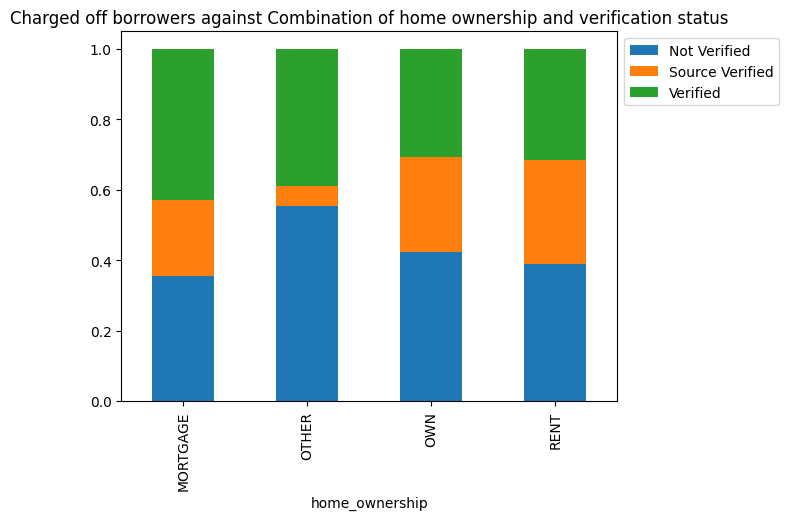

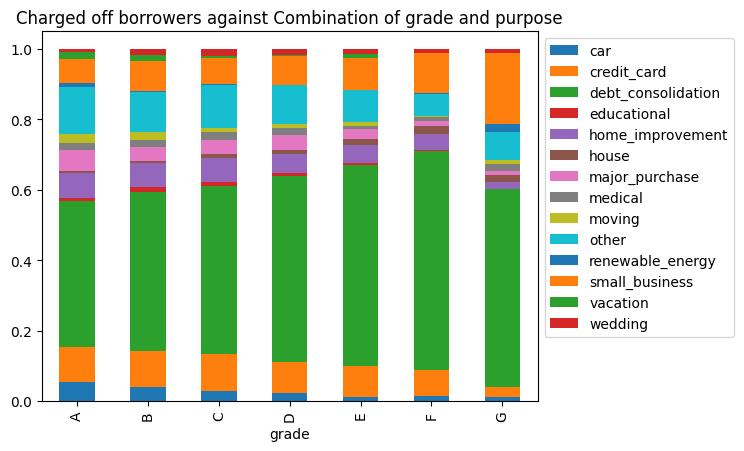

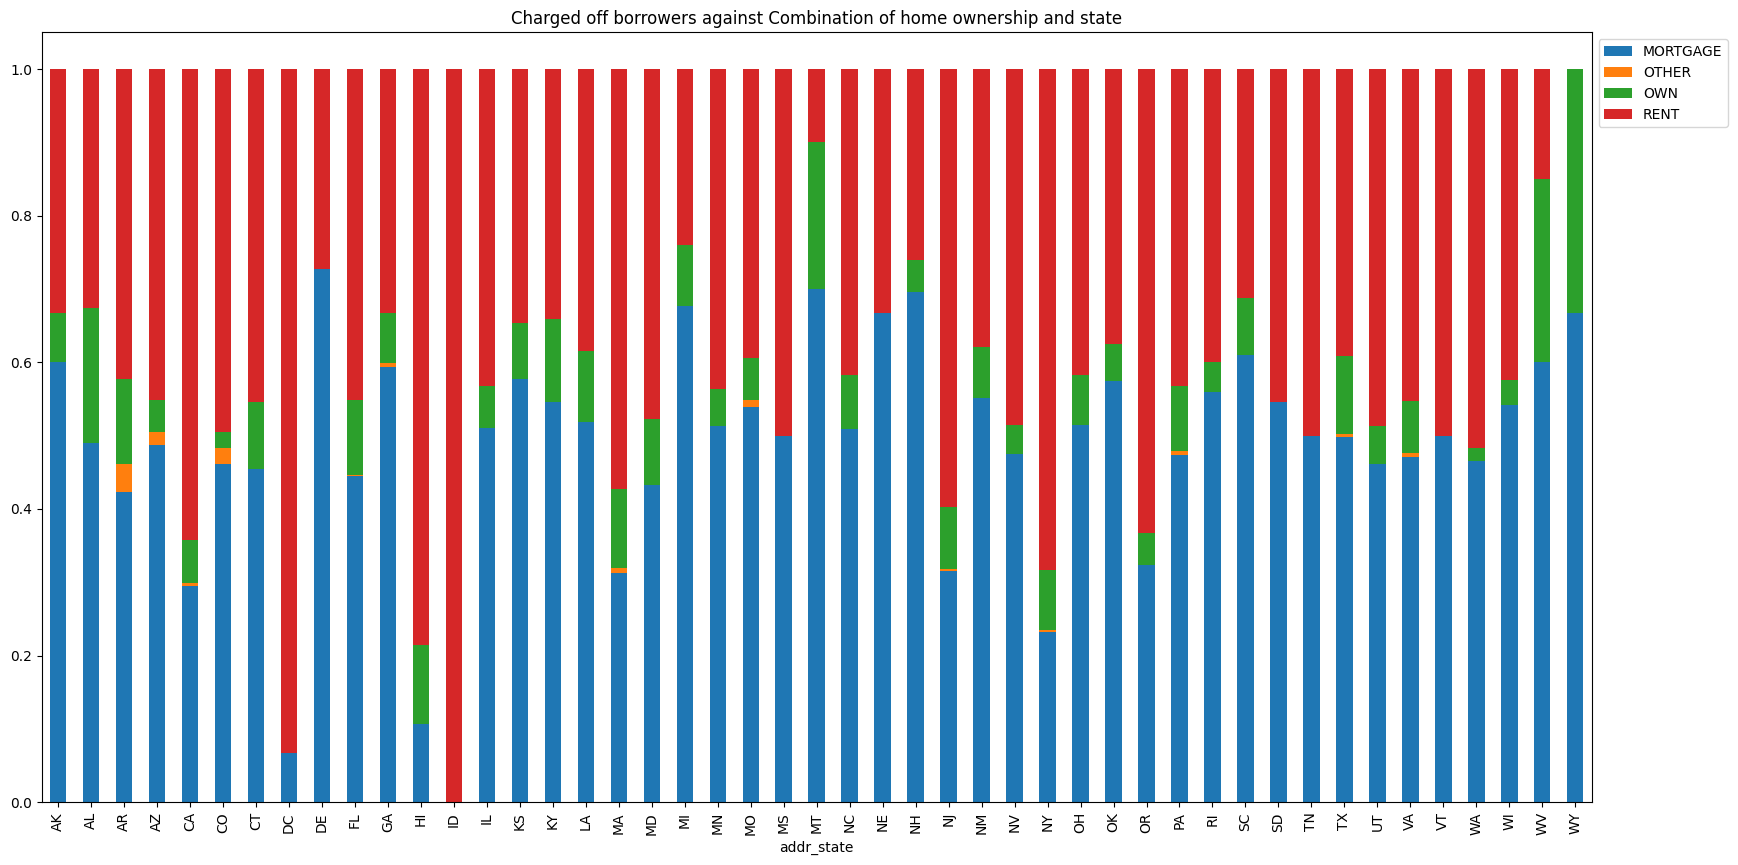

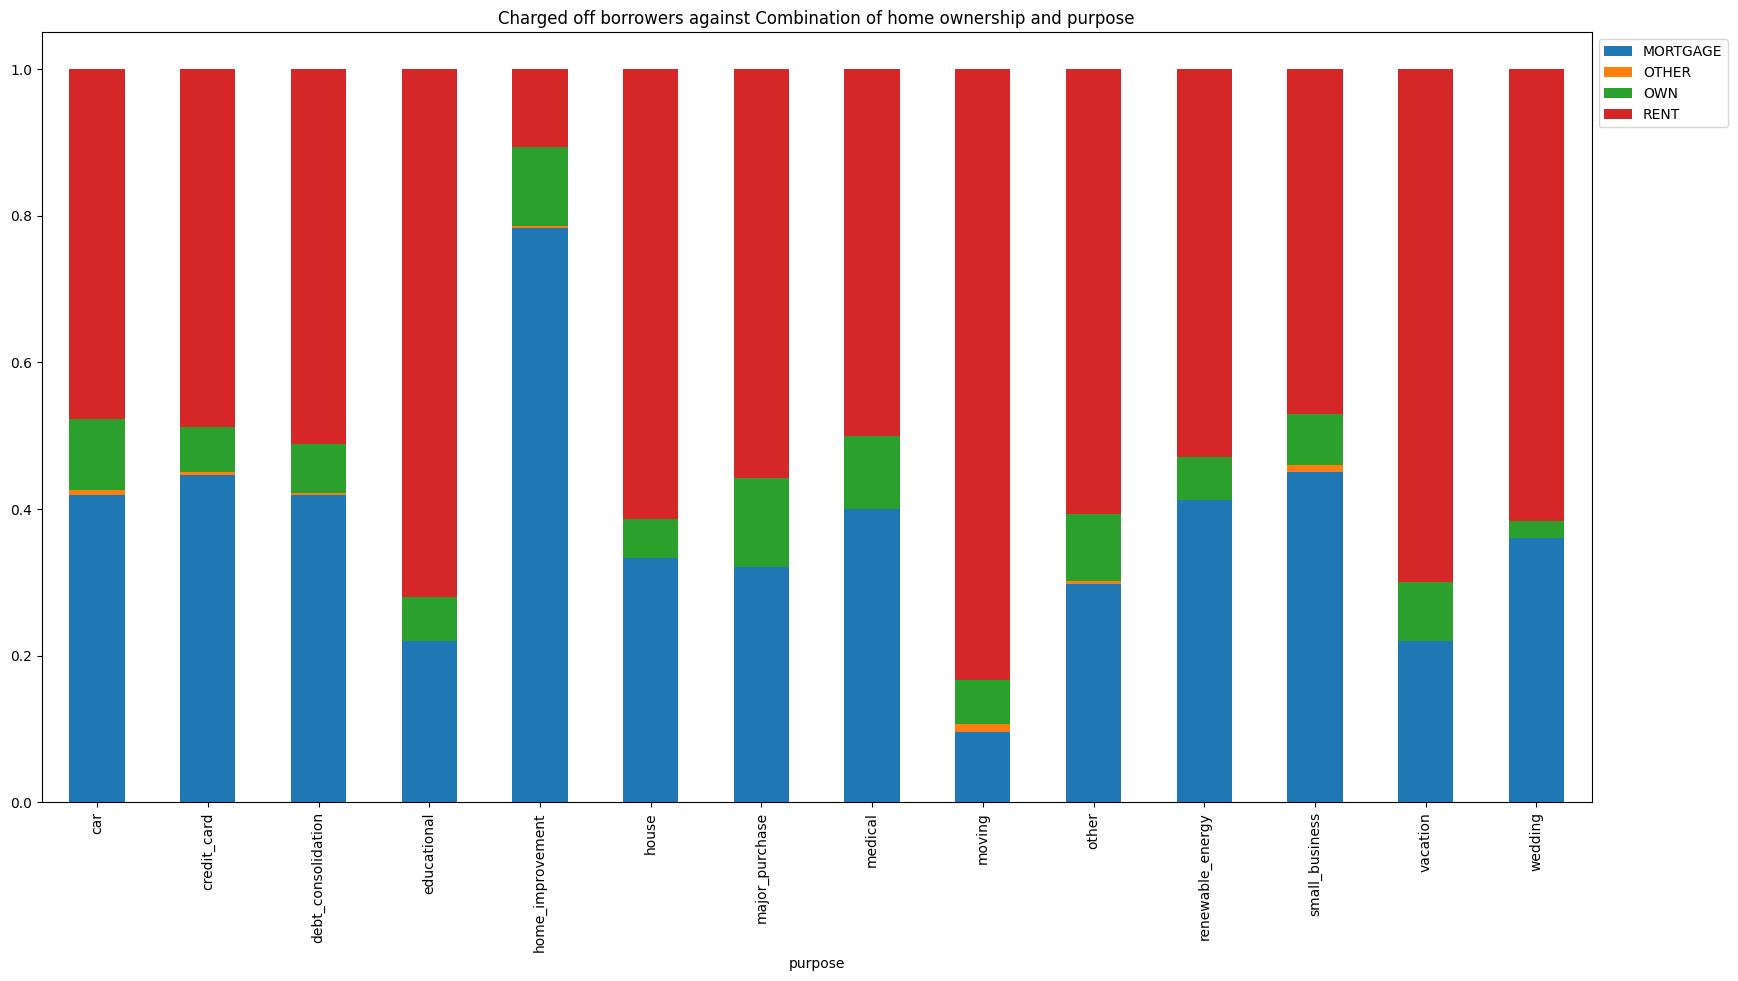

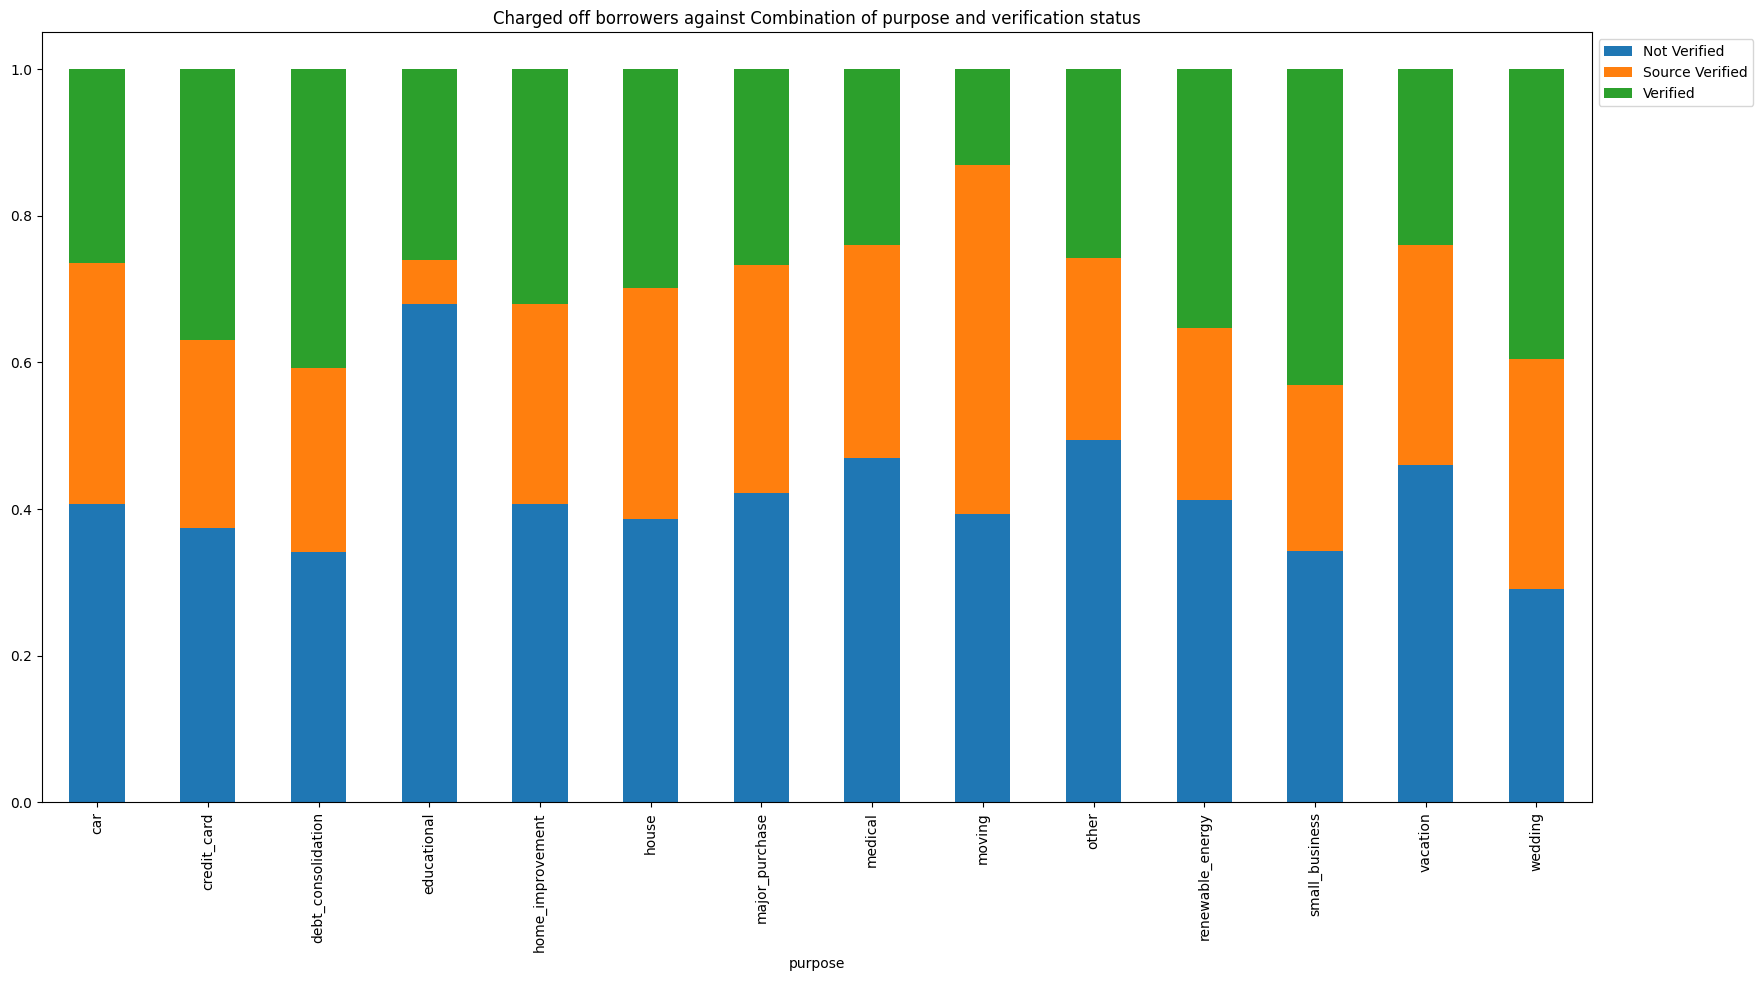

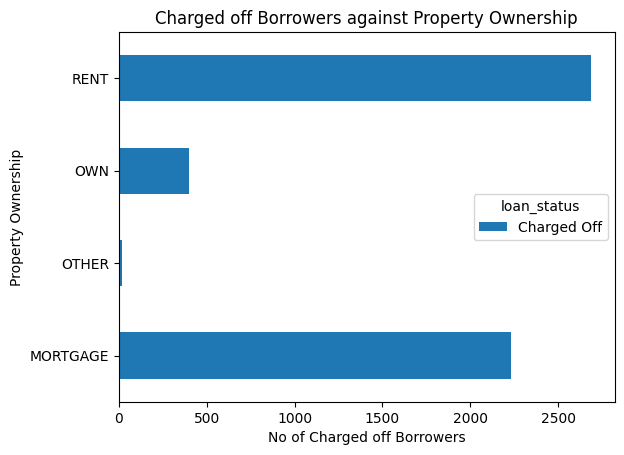

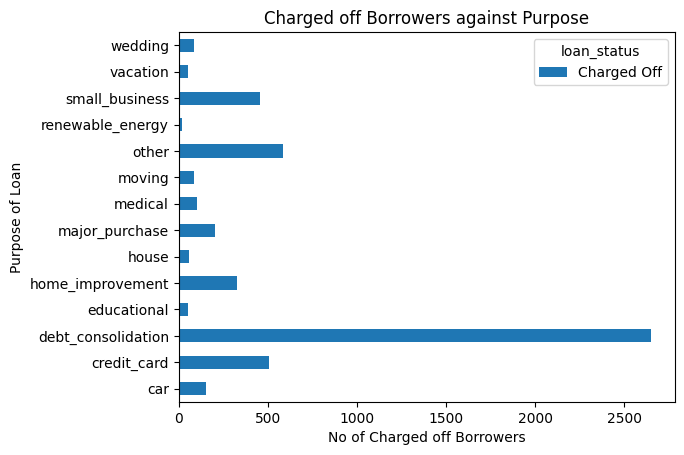

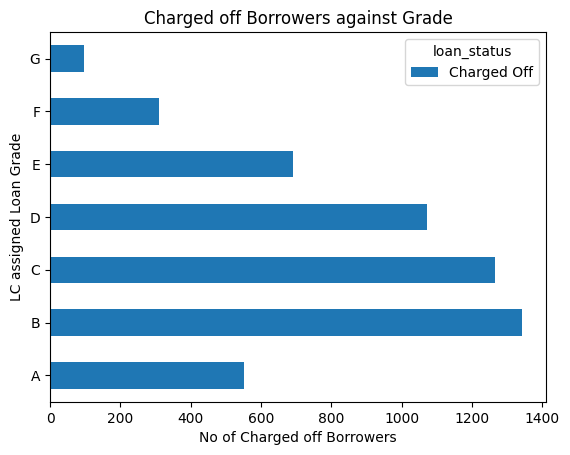

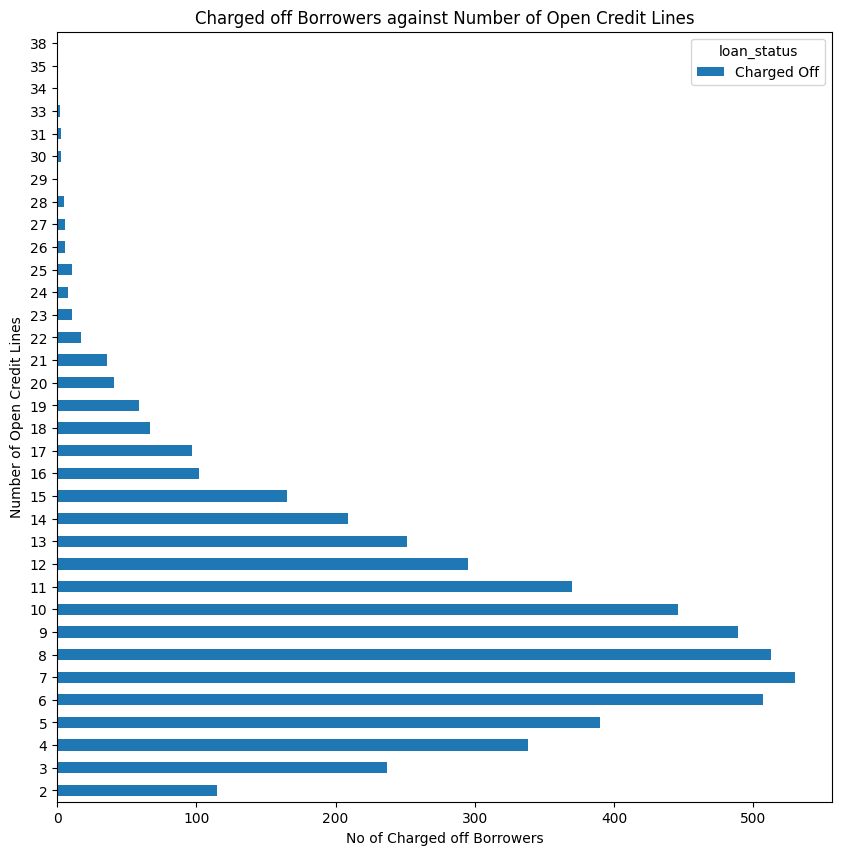

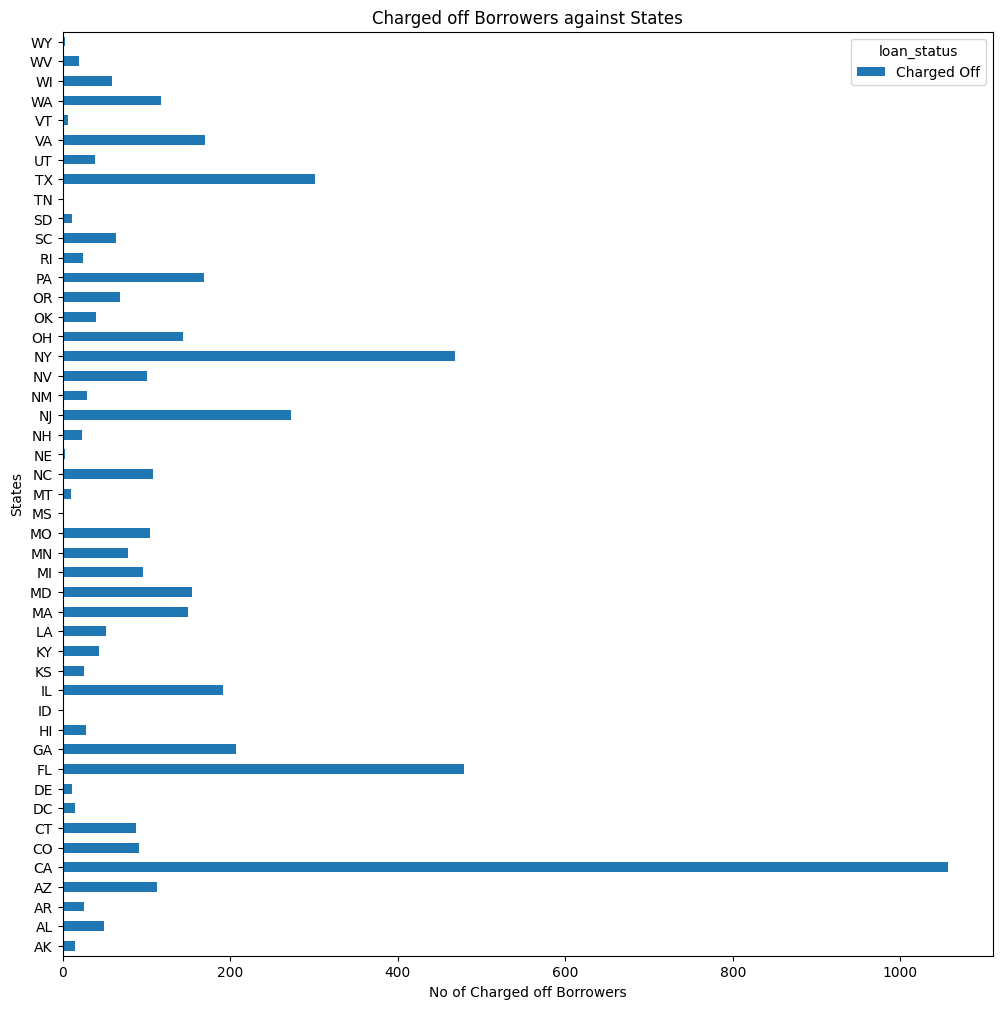

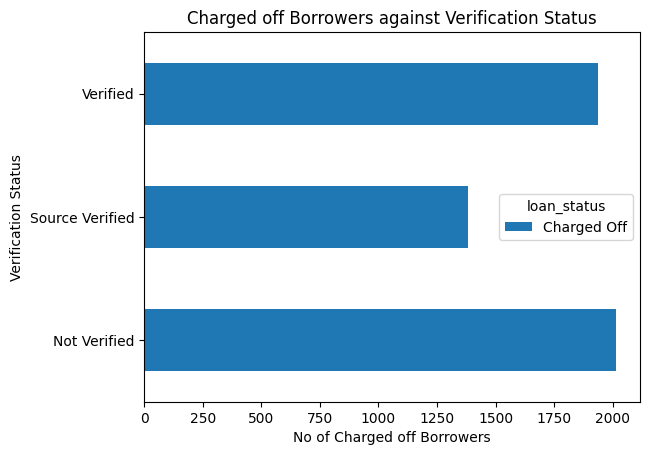

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read CSV into pandas
loanData = pd.read_csv("loan.csv", usecols=["id","member_id","loan_amnt","funded_amnt","funded_amnt_inv",
                                         "term","int_rate","installment","grade","sub_grade","emp_title",
                                         "emp_length","home_ownership","annual_inc","verification_status","last_pymnt_d","total_acc",
                                         "issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","open_acc"])

# To idenitify the columns which are null
print(loanData.isnull().sum())

# clean up remove all employees whose experience is missing and last payment by borrower
loanData = loanData[~loanData.emp_length.isnull()]
loanData = loanData[~loanData.last_pymnt_d.isnull()]


# cleanup to exclude records where total number of credit lines are less than the open accounts
loanData = loanData[loanData.total_acc >= loanData.open_acc]

# In order to analyse charged off borrowers traits, fitlering to borrowers who have charged off
loanDataChargedOff = loanData[loanData['loan_status'] == "Charged Off"]

# Creating correlation between some of the columns of interest and loan_status
dataOwnershipSubset = pd.crosstab(loanDataChargedOff.home_ownership,loanDataChargedOff.loan_status)
dataPurposeSubset = pd.crosstab(loanDataChargedOff.purpose,loanDataChargedOff.loan_status)
dataGradeSubset = pd.crosstab(loanDataChargedOff.grade,loanDataChargedOff.loan_status)
dataOpenACCubset = pd.crosstab(loanDataChargedOff.open_acc,loanDataChargedOff.loan_status)
dataStateSubset = pd.crosstab(loanDataChargedOff.addr_state,loanDataChargedOff.loan_status)
dataVerifiedSubset = pd.crosstab(loanDataChargedOff.verification_status,loanDataChargedOff.loan_status)


# create a pivot table using home_ownership & verification_status to loan_status
homeOwnVsVerificationStatus = pd.pivot_table(data=loanDataChargedOff, values="loan_status", index="home_ownership", columns="verification_status", aggfunc="count")
# calculating the percentage to ensure the stacked bar chart easily analizable
homeOwnVsVerificationStatus_perc = homeOwnVsVerificationStatus[["Not Verified","Source Verified","Verified"]].apply(lambda x: x/x.sum(), axis=1)
homeOwnVsVerificationStatus_perc.plot(kind="bar", stacked="True")
plt.title("Charged off borrowers against Combination of home ownership and verification status")
# To let legends not overlap onto the bars
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()


# create a pivot table using grade & purpose to loan_status
gradeVsPurpose = pd.pivot_table(data=loanDataChargedOff, values="loan_status", index="grade", columns="purpose", aggfunc="count")
# calculating the percentage to ensure the stacked bar chart easily analizable
gradeVsPurpose_perc = gradeVsPurpose[["car","credit_card","debt_consolidation","educational","home_improvement","house","major_purchase","medical","moving","other","renewable_energy","small_business","vacation","wedding"]].apply(lambda x: x/x.sum(), axis=1)
gradeVsPurpose_perc.plot(kind="bar", stacked="True")
plt.title("Charged off borrowers against Combination of grade and purpose")
# To let legends not overlap onto the bars
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()


# create a pivot table using addr_state & home_ownership to loan_status
addrVsHomeOwn = pd.pivot_table(data=loanDataChargedOff, values="loan_status", index="addr_state", columns="home_ownership", aggfunc="count")
# calculating the percentage to ensure the stacked bar chart easily analizable
addrVsHomeOwn_perc = addrVsHomeOwn[["MORTGAGE","OTHER","OWN","RENT"]].apply(lambda x: x/x.sum(), axis=1)
addrVsHomeOwn_perc.plot(kind="bar", stacked="True", figsize=[20,10])
plt.title("Charged off borrowers against Combination of home ownership and state")
# To let legends not overlap onto the bars
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()


# create a pivot table using purpose & home_ownership to loan_status
purposeVsHomeOwn = pd.pivot_table(data=loanDataChargedOff, values="loan_status", index="purpose", columns="home_ownership", aggfunc="count")
# calculating the percentage to ensure the stacked bar chart easily analizable
purposeVsHomeOwn_perc = purposeVsHomeOwn[["MORTGAGE","OTHER","OWN","RENT"]].apply(lambda x: x/x.sum(), axis=1)
purposeVsHomeOwn_perc.plot(kind="bar", stacked="True", figsize=[20,10])
plt.title("Charged off borrowers against Combination of home ownership and purpose")
# To let legends not overlap onto the bars
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()


# create a pivot table using purpose & verification_status to loan_status
purposeVsVerificationStatus = pd.pivot_table(data=loanDataChargedOff, values="loan_status", index="purpose", columns="verification_status", aggfunc="count")
# calculating the percentage to ensure the stacked bar chart easily analizable
purposeVsVerificationStatus_perc = purposeVsVerificationStatus[["Not Verified","Source Verified","Verified"]].apply(lambda x: x/x.sum(), axis=1)
purposeVsVerificationStatus_perc.plot(kind="bar", stacked="True", figsize=[20,10])
plt.title("Charged off borrowers against Combination of purpose and verification status")
# To let legends not overlap onto the bars
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()


#print(dataSubset)
barplot = dataOwnershipSubset.plot.barh(rot=0)
# Show Plot
plt.title("Charged off Borrowers against Property Ownership")
plt.xlabel("No of Charged off Borrowers")
plt.ylabel("Property Ownership")
plt.show()

#print(dataSubset)
barplot = dataPurposeSubset.plot.barh(rot=0)
# Show Plot
plt.title("Charged off Borrowers against Purpose")
plt.xlabel("No of Charged off Borrowers")
plt.ylabel("Purpose of Loan")
plt.show()

#print(dataSubset)
barplot = dataGradeSubset.plot.barh(rot=0)
# Show Plot
plt.title("Charged off Borrowers against Grade")
plt.xlabel("No of Charged off Borrowers")
plt.ylabel("LC assigned Loan Grade")
plt.show()

#print(dataSubset)
barplot = dataOpenACCubset.plot.barh(rot=0,figsize = (10, 10))
# Show Plot
plt.title("Charged off Borrowers against Number of Open Credit Lines")
plt.xlabel("No of Charged off Borrowers")
plt.ylabel("Number of Open Credit Lines")
plt.show()

#print(dataSubset)
barplot = dataStateSubset.plot.barh(rot=0,figsize = (12, 12))
# Show Plot
plt.title("Charged off Borrowers against States")
plt.xlabel("No of Charged off Borrowers")
plt.ylabel("States")
plt.show()

#print(dataSubset)
barplot = dataVerifiedSubset.plot.barh(rot=0)
# Show Plot
plt.title("Charged off Borrowers against Verification Status")
plt.xlabel("No of Charged off Borrowers")
plt.ylabel("Verification Status")
plt.show()